In [22]:
#make sure to download all of these packages
#python version that I used was 3.10, but most version of 3 should work
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly as pt
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
red_wine_data = pd.read_csv("data/winequality-red.csv",delimiter=";")
white_wine_data = pd.read_csv("data/winequality-white.csv",delimiter=";")

In [9]:
red_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Seems to be no missing data within all of the features at least for red

In [11]:
combined = [red_wine_data,white_wine_data]

In [17]:
fig = go.Figure()
#getting the individual amounts of times the quality(lablels of the wine) appears in the dataset
quality_amounts_red = red_wine_data["quality"].groupby(red_wine_data["quality"]).count()
quality_amounts_white = white_wine_data["quality"].groupby(white_wine_data["quality"]).count()

#adding to a graph
fig.add_trace(go.Bar(x=quality_amounts_red.index,y=quality_amounts_red.values,name="reds"))
fig.add_trace(go.Bar(x=quality_amounts_white.index,y=quality_amounts_white.values,name="white"))

fig.show()

Overall the data set is imbalanced, so a accuracy measure will have to handle imbalanced. There is much more data in white, but at least it appears that they follow similar distribution

<AxesSubplot: >

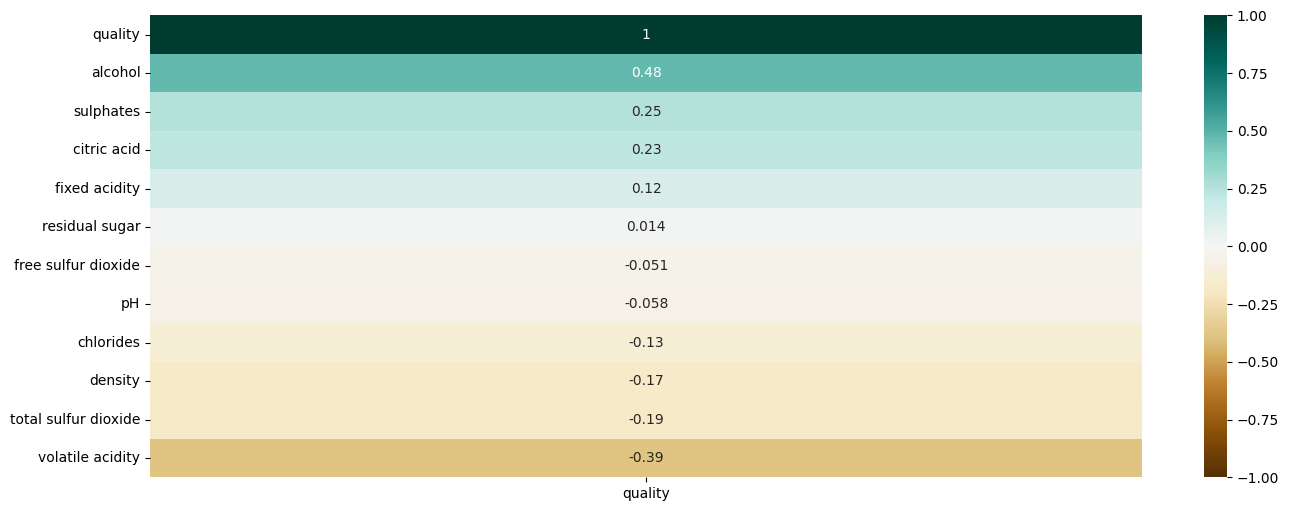

In [25]:
"""
vmin,vmax - the range of values for colormap(min-max)
cmap - sets the specific colormap to use
cetner - takes a float to centera color map
annot - if True sets the correlation values to appear
cbar - if False, the colorbar disapears

"""
plt.figure(figsize=(16,6))
sns.heatmap(red_wine_data.corr()[["quality"]].sort_values(by='quality',ascending=False), annot=True, vmin=-1,vmax=1,cmap='BrBG')

So, this diagram shows the relationship (correlation) between a feature and our label (quality). If the value is high(1) or low(-1) that entails that there is a strong correlation between the label and the quality. Unfortunantly we don't have many high ones of the bat, high ones being (volatile acididty and alcohol). However, this is raw data that we can try nead the data a bit more (binning and such).

<AxesSubplot: >

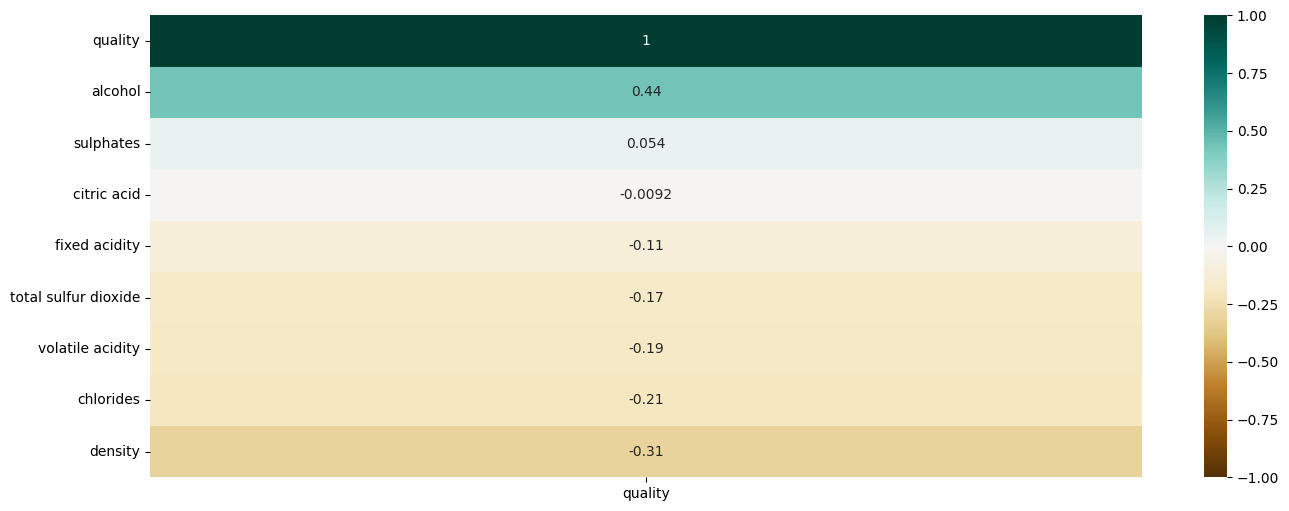

In [37]:
plt.figure(figsize=(16,6))
sns.heatmap(white_wine_data.corr()[["quality"]].sort_values(by='quality',ascending=False), annot=True, vmin=-1,vmax=1,cmap='BrBG')

In white wines it appears that the lowest correlations (between -0.1 and 0.1) are the same (ph,free sulfure dioxide,residual sugar), so it seems fair to drop these from consideration; however it might be worthwhile to check later if there are some values that are throwing off others. For inital EDA these will be dropped

Alcohol shold be included in both

Citric acid and suplates appeared to show strong correlation in red but not white. Might have to change according to the wine

In [34]:
red_wine_dropped = red_wine_data.drop(["residual sugar", "pH","free sulfur dioxide"],axis=1)
white_wine_data = white_wine_data.drop(["residual sugar", "pH","free sulfur dioxide"],axis=1)

In [43]:
#Alcohol stuff
from plotly.subplots import make_subplots

fig = make_subplots(rows=2,cols=2)

#histogram for red
fig.append_trace(go.Histogram(
    x=red_wine_data["alcohol"],
    nbinsx=10,
    name="red hist"), row=1,col=1)

#boxplot for red
fig.append_trace(go.Box(
    x=red_wine_data["alcohol"],
    name="red box"
),row=1,col=2)

#histogram for white
fig.append_trace(go.Histogram(
    x=white_wine_data["alcohol"],
    nbinsx=10,
    name="white hist"), row=2,col=1)

#boxplot for white
fig.append_trace(go.Box(
    x=red_wine_data["alcohol"],
    name="white box"
),row=2,col=2)

fig.update_layout(height=600, width=800, title_text="Alochol data")
fig.show()

It appears that we have a very similar distribution in both white and red white. We should most likely include the outliers in highest bin in both, and try and bin up the alcohol in both and see if that improves correlation. We will need to decide wheather it is relvent to keep the bin of 8-9% in white or not, and how to handle the same bin in red.  